# Uber Fare Prediction

In [2]:
import io
import os
import pandas as pd # Importing I/O files
import numpy as np # linear albegrea
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
uber=pd.read_csv('uber fares data.csv') # importing the file as dataframe

In [5]:
# head() is used to display the first few rows of a DataFrame or a Series. It helps you get a quick overview of the data.
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
# tail() method is similar to head(), but it displays the last few rows of a DataFrame or a Series.
uber.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [7]:
# checking shape of uber dataframe
uber.shape

(200000, 9)

In [8]:
# The dtypes attribute of a DataFrame provides information about the data types of each column.
uber.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
# The info() method provides a concise summary of a DataFrame, including information about the data types, 
# non-null values, and memory usage.
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# EXploratory Data Analysis(EDA)

In [10]:
#Checking how many null values are there in earch column
uber.isnull().sum().sort_values(ascending=False)

dropoff_longitude    1
dropoff_latitude     1
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
passenger_count      0
dtype: int64

In [11]:
uber.dropoff_longitude.value_counts()

 0.000000     3764
-73.137393      65
-73.980400      21
-73.991025      21
-73.978952      20
              ... 
-73.967661       1
-74.000016       1
-73.884682       1
-73.984076       1
-73.858957       1
Name: dropoff_longitude, Length: 76894, dtype: int64

In [12]:
uber.dropoff_longitude=uber.dropoff_longitude.fillna(0.000000)

In [13]:
uber.dropoff_latitude.value_counts()

0.000000     3758
41.366138      65
40.750207      21
40.756400      17
40.750322      16
             ... 
40.820070       1
40.656993       1
40.776530       1
40.783642       1
40.768793       1
Name: dropoff_latitude, Length: 90585, dtype: int64

In [14]:
uber.dropoff_latitude=uber.dropoff_latitude.fillna(0.000000)

In [15]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [16]:
#critical variable - pickup_datetime
uber.pickup_datetime.head()

0    2015-05-07 19:52:06 UTC
1    2009-07-17 20:04:56 UTC
2    2009-08-24 21:45:00 UTC
3    2009-06-26 08:22:21 UTC
4    2014-08-28 17:47:00 UTC
Name: pickup_datetime, dtype: object

## Converting pickup_datetime dateformat from object(UTC) to mixed

In [18]:
uber.pickup_datetime.head()

0    2015-05-07 19:52:06 UTC
1    2009-07-17 20:04:56 UTC
2    2009-08-24 21:45:00 UTC
3    2009-06-26 08:22:21 UTC
4    2014-08-28 17:47:00 UTC
Name: pickup_datetime, dtype: object

## Converting pickup_datetime from global to local time 

In [19]:
uber.pickup_datetime=pd.to_datetime(uber.pickup_datetime).dt.tz_localize(None)

In [20]:
uber.pickup_datetime.head()

0   2015-05-07 19:52:06
1   2009-07-17 20:04:56
2   2009-08-24 21:45:00
3   2009-06-26 08:22:21
4   2014-08-28 17:47:00
Name: pickup_datetime, dtype: datetime64[ns]

In [21]:
uber_df=uber[['pickup_datetime','fare_amount','passenger_count']]

# Resampling the data from Population(uber_df) to sample data(daily)

In [22]:
daily=uber_df.resample('D',on='pickup_datetime').sum() #D- we are converted into daily wise data.

In [23]:
daily.head()

,fare_amount,passenger_count
pickup_datetime,,
2009-01-01,621.20,113
2009-01-02,739.55,113
2009-01-03,935.70,147
2009-01-04,733.30,132
2009-01-05,550.95,109


In [24]:
daily.tail()

,fare_amount,passenger_count
pickup_datetime,,
2015-06-26,1082.12,145
2015-06-27,1114.24,133
2015-06-28,905.58,123
2015-06-29,764.12,99
2015-06-30,884.66,103


# Resampling the data from Population(uber_df) to sample data(weekly)

In [25]:
weekly=uber_df.resample('W',on='pickup_datetime').sum()

In [26]:
weekly.head()

,fare_amount,passenger_count
pickup_datetime,,
2009-01-04,3029.75,505
2009-01-11,4953.80,876
2009-01-18,5627.95,991
2009-01-25,5510.40,941
2009-02-01,6023.50,1037


# Resampling the data from Population(uber_df) to sample data(montly)

In [27]:
monthly=uber_df.resample('M',on='pickup_datetime').sum()
monthly.head()

,fare_amount,passenger_count
pickup_datetime,,
2009-01-31,24471.80,4225
2009-02-28,22195.75,3873
2009-03-31,27589.25,4567
2009-04-30,26010.95,4231
2009-05-31,26626.25,4437


### Dependent variable is fare_amount, one of the independent vaariable is passenger count
### 1. Extracting inidependent variables from date (to convert multivariate)
### 2. Datetime library is part of pandas (dt.weekday,dt.month,dt.quarter,dt.hour) from daily basis

In [28]:
daily=daily.reset_index()

In [29]:
daily['weekday']=uber_df.pickup_datetime.dt.weekday
#0-monday,1-tuesday,2-wednessday,3-thursday,4-friday,5-saturday,6-sunday

In [30]:
daily.head()

,pickup_datetime,fare_amount,passenger_count,weekday
0,2009-01-01,621.20,113,3
1,2009-01-02,739.55,113,4
2,2009-01-03,935.70,147,0
3,2009-01-04,733.30,132,4
4,2009-01-05,550.95,109,3


In [31]:
daily['hour']=daily.pickup_datetime.dt.hour

In [32]:
daily.head()

,pickup_datetime,fare_amount,passenger_count,weekday,hour
0,2009-01-01,621.20,113,3,0
1,2009-01-02,739.55,113,4,0
2,2009-01-03,935.70,147,0,0
3,2009-01-04,733.30,132,4,0
4,2009-01-05,550.95,109,3,0


In [33]:
daily.hour.value_counts()

0    2372
Name: hour, dtype: int64

In [34]:
daily.shape

(2372, 5)

# Extracting inidependent variables from date (to convert multivariate) from hourly basis

In [35]:
hourly=uber_df.resample('60Min',on='pickup_datetime').sum()

In [36]:
hourly.head()

,fare_amount,passenger_count
pickup_datetime,,
2009-01-01 01:00:00,21.5,4
2009-01-01 02:00:00,44.9,9
2009-01-01 03:00:00,17.8,4
2009-01-01 04:00:00,39.2,5
2009-01-01 05:00:00,14.2,1


In [37]:
hourly=hourly.reset_index()

In [38]:
hourly['weekday']=hourly.pickup_datetime.dt.weekday

In [39]:
hourly['hour']=hourly.pickup_datetime.dt.hour

In [40]:
hourly['month']=hourly.pickup_datetime.dt.month

In [41]:
hourly['quarter']=hourly.pickup_datetime.dt.quarter

In [42]:
hourly['year']=hourly.pickup_datetime.dt.year

In [43]:
hourly.head()

,pickup_datetime,fare_amount,passenger_count,weekday,hour,month,quarter,year
0,2009-01-01 01:00:00,21.5,4,3,1,1,1,2009
1,2009-01-01 02:00:00,44.9,9,3,2,1,1,2009
2,2009-01-01 03:00:00,17.8,4,3,3,1,1,2009
3,2009-01-01 04:00:00,39.2,5,3,4,1,1,2009
4,2009-01-01 05:00:00,14.2,1,3,5,1,1,2009


In [44]:
def get_season(dt):
    if dt.month in [3, 4, 5]:
        return 'Spring'
    elif dt.month in [6, 7, 8]:
        return 'Summer'
    elif dt.month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to create the 'season' column
hourly['season'] = hourly['pickup_datetime'].apply(get_season)

In [45]:
hourly.head()

,pickup_datetime,fare_amount,passenger_count,weekday,hour,month,quarter,year,season
0,2009-01-01 01:00:00,21.5,4,3,1,1,1,2009,Winter
1,2009-01-01 02:00:00,44.9,9,3,2,1,1,2009,Winter
2,2009-01-01 03:00:00,17.8,4,3,3,1,1,2009,Winter
3,2009-01-01 04:00:00,39.2,5,3,4,1,1,2009,Winter
4,2009-01-01 05:00:00,14.2,1,3,5,1,1,2009,Winter


In [46]:
hourly.season.value_counts()

Spring    15456
Winter    14399
Summer    13968
Fall      13104
Name: season, dtype: int64

In [47]:
# Define a function to categorize hours
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17: 
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create the 'Daytime' column
hourly['Daytime'] = hourly['pickup_datetime'].dt.hour.apply(categorize_hour)

In [48]:
hourly.head()

,pickup_datetime,fare_amount,passenger_count,weekday,hour,month,quarter,year,season,Daytime
0,2009-01-01 01:00:00,21.5,4,3,1,1,1,2009,Winter,Night
1,2009-01-01 02:00:00,44.9,9,3,2,1,1,2009,Winter,Night
2,2009-01-01 03:00:00,17.8,4,3,3,1,1,2009,Winter,Night
3,2009-01-01 04:00:00,39.2,5,3,4,1,1,2009,Winter,Night
4,2009-01-01 05:00:00,14.2,1,3,5,1,1,2009,Winter,Morning


In [49]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56927 entries, 0 to 56926
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup_datetime  56927 non-null  datetime64[ns]
 1   fare_amount      56927 non-null  float64       
 2   passenger_count  56927 non-null  int64         
 3   weekday          56927 non-null  int64         
 4   hour             56927 non-null  int64         
 5   month            56927 non-null  int64         
 6   quarter          56927 non-null  int64         
 7   year             56927 non-null  int64         
 8   season           56927 non-null  object        
 9   Daytime          56927 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 4.3+ MB


In [50]:
hourly.Daytime.value_counts()

Night        18975
Morning      16604
Afternoon    11860
Evening       9488
Name: Daytime, dtype: int64

In [51]:
hourly=pd.get_dummies(hourly,columns=['weekday','hour','quarter','year','season','Daytime'])

In [52]:
hourly.head()

,pickup_datetime,fare_amount,passenger_count,month,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,year_2014,year_2015,season_Fall,season_Spring,season_Summer,season_Winter,Daytime_Afternoon,Daytime_Evening,Daytime_Morning,Daytime_Night
0,2009-01-01 01:00:00,21.5,4,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2009-01-01 02:00:00,44.9,9,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2009-01-01 03:00:00,17.8,4,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2009-01-01 04:00:00,39.2,5,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2009-01-01 05:00:00,14.2,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [53]:
hourly=hourly.replace({False: 0, True: 1})

In [54]:
hourly[['fare_amount','passenger_count']].corr()

,fare_amount,passenger_count
fare_amount,1.000000,0.691062
passenger_count,0.691062,1.000000


In [55]:
uber_nonzero=hourly[hourly.fare_amount!=0]

In [56]:
y=hourly.fare_amount
X=hourly.drop(['pickup_datetime','fare_amount'],axis=1)

<Axes: >

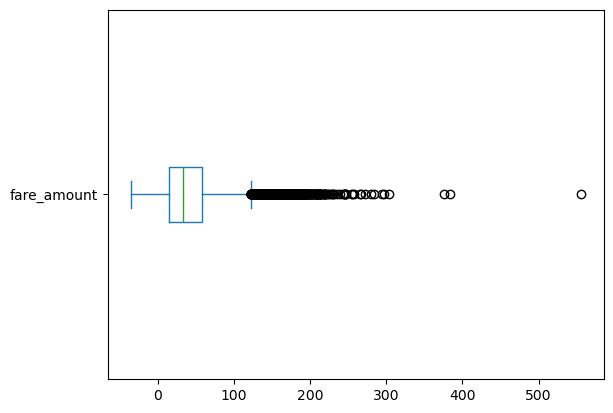

In [57]:
y.plot(kind='box',vert=False)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

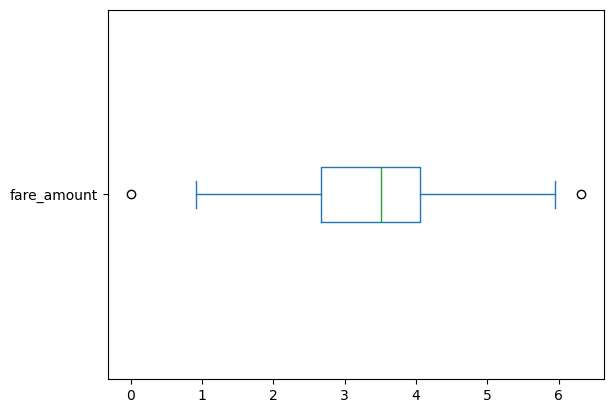

In [58]:
np.log(y).plot(kind='box',vert=False)

In [67]:
np.log1p(y).isnull().sum()

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


3

## Linear Regression 

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
reg=LinearRegression()

In [61]:
regmodel=reg.fit(X,y)

In [62]:
regmodel.score(X,y)

0.5086861995349856

In [68]:
regmodel.score(X,y)

0.5086861995349856

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
cross_val_score(reg,X,y)

array([-2.26587109e+24,  4.33061239e-01,  5.18096954e-01, -1.97573917e+19,
       -4.66900875e+20])

In [71]:
np.mean([-2.26587109e+24,  4.33061239e-01,  5.18096954e-01, -1.97573917e+19,-4.66900875e+20])

-4.5327154965334006e+23

In [72]:
regpredict=regmodel.predict(X)

In [73]:
regresid=y-regpredict

In [74]:
np.sqrt(np.mean(regresid**2))

23.26552629095697

# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
tree=DecisionTreeRegressor()

In [77]:
treemodel=tree.fit(X,y)

In [78]:
treemodel.score(X,y)

0.9516409166666177

In [79]:
cross_val_score(tree,X,y)

array([-0.26576722,  0.09411365, -0.04396766,  0.14476298,  0.08513613])

In [80]:
np.mean([-0.21562031,  0.11989609, -0.03465748,  0.15361033,  0.03406357])

0.011458439999999995

In [81]:
treepredict=tree.predict(X)

In [82]:
treeresid=y-treepredict

In [83]:
np.sqrt(np.mean(treeresid**2))

7.299152369425891

# Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
RF=RandomForestRegressor(n_estimators=1000)

In [86]:
rfmodel=RF.fit(X,y)

In [87]:
rfmodel.score(X,y)

0.8957544904286234

In [88]:
cross_val_score(RF,X,y)

array([0.44312524, 0.49805453, 0.48975309, 0.43306867, 0.43977086])

In [89]:
np.mean([0.44312524, 0.49805453, 0.48975309, 0.43306867, 0.43977086])

0.46075447799999997

In [90]:
rfpredict=rfmodel.predict(X)

In [91]:
rfresid=y-rfpredict

In [92]:
np.sqrt(np.mean(rfresid**2))

10.71672478773534

# Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [107]:
gbm=GradientBoostingRegressor(max_depth=8,n_estimators=1000)

In [108]:
gbmmodel=gbm.fit(X,y)

In [109]:
gbmmodel.score(X,y)

0.8445961112397582

In [110]:
cross_val_score(gbm,X,y)

array([0.40559533, 0.4128615 , 0.362216  , 0.39966756, 0.35778401])

In [111]:
np.mean([0.40559533, 0.4128615 , 0.362216  , 0.39966756, 0.35778401])

0.38762487999999995

In [112]:
gbmpredict=gbm.predict(X)

In [113]:
gbmresid=y-gbmpredict

In [114]:
np.sqrt(np.mean(gbmresid**2))

13.084717200977414

# SVR

In [115]:
from sklearn.svm import SVR

In [116]:
svr=SVR(C=4)

In [117]:
svrmodel=svr.fit(X,y)

In [118]:
svrmodel.score(X,y)

0.5288119958826082

In [119]:
cross_val_score(svr,X,y)

array([0.56276338, 0.53871073, 0.54811712, 0.45142938, 0.45401615])

In [120]:
np.mean([0.56276338, 0.53871073, 0.54811712, 0.45142938, 0.45401615])

0.511007352

In [121]:
Svrpredict=svr.predict(X)

In [122]:
svrresid=y-Svrpredict

In [123]:
np.sqrt(np.mean(svrresid**2))

22.784028345150606

# KNN(KNearestNeighbor)

In [124]:
from sklearn.neighbors import KNeighborsRegressor

In [125]:
knr=KNeighborsRegressor()

In [126]:
knrmodel=knr.fit(X,y)

In [127]:
knrmodel.score(X,y)

0.6338955713389165

In [128]:
cross_val_score(knr,X,y)

array([0.39126096, 0.39833079, 0.45474119, 0.41673557, 0.42071579])

In [129]:
np.mean([0.39126096, 0.39833079, 0.45474119, 0.41673557, 0.42071579])

0.41635685999999994

In [130]:
knrpredict=knrmodel.predict(X)

In [131]:
knrresid=y-knrpredict

In [132]:
np.sqrt(np.mean(knrresid**2))

20.08333769414311

# XGBoost

In [133]:
from xgboost.sklearn import XGBRegressor

In [134]:
xgbr=XGBRegressor()

In [135]:
xgbr_model=xgbr.fit(X,y)

In [136]:
xgbr_model.score(X,y)

0.6181770574497178

In [137]:
cross_val_score(xgbr,X,y)

array([0.49743599, 0.52402329, 0.50542645, 0.47100673, 0.47073421])

In [138]:
np.mean([0.49743599, 0.52402329, 0.50542645, 0.47100673, 0.47073421])

0.49372533399999996

In [139]:
Xgbr_predict=xgbr.predict(X)

In [140]:
xgbr_resid=y-Xgbr_predict

In [142]:
np.sqrt(np.mean(xgbr_resid**2))

20.50994093715973

# Summary:
After building and evaluating various machine learning models for the House Prices dataset, we have compiled additional information, including RMSE(Root Mean Square Error), to provide a comprehensive summary. Below is a table summarizing the models, their machine learning scores, r_square, and RMSE values:

|Model Name|R_square|RMSE|
|:--:|:--:|:--:|
| Linear Regression |0.5086861995349856|23.26552629095697|
| **Decision Tree** |**0.9516409166666177**|**7.299152369425891**|
| Random Forest |0.8957544904286234|10.71672478773534|
| Gradient Boosting Machine |0.8445961112397582|13.084717200977414|
| Support Vector Machine |0.5288119958826082|22.784028345150606|
| KNearestNeighbor |0.6338955713389165|20.08333769414311|
| Xgboost |0.6181770574497178|20.50994093715973|


The "Decision Tree" model has a significantly lower RMSE score than its counterparts, indicating its superior predictive performance for this dataset. Despite a lower accuracy score, the lower RMSE value suggests that the Decision Tree model yields predictions more closely aligned with actual outcomes, which is particularly valuable for regression tasks where numerical prediction accuracy is crucial.

In light of these findings, it's advisable to consider thDecision Treees model as a more reliable option for regression analysis on thUber fareses dataset, prioritizing RMSE as the key performance indicator scores.